In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_name = "datasets/earthquakes.csv"
df1 = pd.read_csv(dataset_name)

In [3]:
df1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
# Now let's convert the data + time string columns into actual dates (we use 'coerce' because not all strings have a nice format)
df1["Datetime"] = pd.to_datetime( df1["Date"] + " " + df1["Time"], errors = 'coerce')

In [5]:
# Datetime to string formatting
df1["Datetime"][0].strftime("%A or %a and in %B")

'Saturday or Sat and in January'

In [6]:
# Index each row by the Datetime column
df1 = df1.set_index(["Datetime"])

In [7]:
# Sometimes the data type have been guess incorrectly, but we can change that at runtime
df1["Depth"].astype(int)

Datetime
1965-01-02 13:44:18    131
1965-01-04 11:29:49     80
1965-01-05 18:05:58     20
1965-01-08 18:49:43     15
1965-01-09 13:32:50     15
                      ... 
2016-12-28 08:22:12     12
2016-12-28 09:13:47      8
2016-12-28 12:38:51     10
2016-12-29 22:30:19     79
2016-12-30 20:08:28     11
Name: Depth, Length: 23412, dtype: int32

# Loading CSV and parsing dates

In [8]:
# We can read, parse dates from a given column and make the new column the index one in just one step!
df1 = pd.read_csv(dataset_name, index_col=0, parse_dates=[["Date","Time"]])

In [9]:
df1.index
# Which is still an object: we want a Datetime type

Index(['01/02/1965 13:44:18', '01/04/1965 11:29:49', '01/05/1965 18:05:58',
       '01/08/1965 18:49:43', '01/09/1965 13:32:50', '01/10/1965 13:36:32',
       '01/12/1965 13:32:25', '01/15/1965 23:17:42', '01/16/1965 11:32:37',
       '01/17/1965 10:43:17',
       ...
       '12/24/2016 03:58:55', '12/25/2016 14:22:27', '12/25/2016 14:32:13',
       '12/27/2016 23:20:56', '12/28/2016 08:18:01', '12/28/2016 08:22:12',
       '12/28/2016 09:13:47', '12/28/2016 12:38:51', '12/29/2016 22:30:19',
       '12/30/2016 20:08:28'],
      dtype='object', name='Date_Time', length=23412)

In [10]:
df1.index = pd.to_datetime(df1.index, errors = "coerce")

In [11]:
df1.index
# Now it's of the correct type

DatetimeIndex(['1965-01-02 13:44:18', '1965-01-04 11:29:49',
               '1965-01-05 18:05:58', '1965-01-08 18:49:43',
               '1965-01-09 13:32:50', '1965-01-10 13:36:32',
               '1965-01-12 13:32:25', '1965-01-15 23:17:42',
               '1965-01-16 11:32:37', '1965-01-17 10:43:17',
               ...
               '2016-12-24 03:58:55', '2016-12-25 14:22:27',
               '2016-12-25 14:32:13', '2016-12-27 23:20:56',
               '2016-12-28 08:18:01', '2016-12-28 08:22:12',
               '2016-12-28 09:13:47', '2016-12-28 12:38:51',
               '2016-12-29 22:30:19', '2016-12-30 20:08:28'],
              dtype='datetime64[ns]', name='Date_Time', length=23412, freq=None)

In [12]:
df1.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date_Time,,,,,,,,,,,,,,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23412 entries, 1965-01-02 13:44:18 to 2016-12-30 20:08:28
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude                    23412 non-null  float64
 1   Longitude                   23412 non-null  float64
 2   Type                        23412 non-null  object 
 3   Depth                       23412 non-null  float64
 4   Depth Error                 4461 non-null   float64
 5   Depth Seismic Stations      7097 non-null   float64
 6   Magnitude                   23412 non-null  float64
 7   Magnitude Type              23409 non-null  object 
 8   Magnitude Error             327 non-null    float64
 9   Magnitude Seismic Stations  2564 non-null   float64
 10  Azimuthal Gap               7299 non-null   float64
 11  Horizontal Distance         1604 non-null   float64
 12  Horizontal Error            1156 non-null   float64
 

# Slicing the data set

In [14]:
df2 = df1[["Latitude","Longitude","Type", "Depth","Magnitude"]]
df2

,Latitude,Longitude,Type,Depth,Magnitude
Date_Time,,,,,
1965-01-02 13:44:18,19.2460,145.6160,Earthquake,131.60,6.0
1965-01-04 11:29:49,1.8630,127.3520,Earthquake,80.00,5.8
1965-01-05 18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2
1965-01-08 18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8
1965-01-09 13:32:50,11.9380,126.4270,Earthquake,15.00,5.8
...,...,...,...,...,...
2016-12-28 08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6
2016-12-28 09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5
2016-12-28 12:38:51,36.9179,140.4262,Earthquake,10.00,5.9


In [15]:
df2.groupby(["Type"]).mean().sort_values(by=["Magnitude"], ascending=False)

,Latitude,Longitude,Depth,Magnitude
Type,,,,
Rock Burst,-47.911000,99.593000,1.000000,6.200000
Earthquake,1.386383,39.746049,71.313913,5.882763
Nuclear Explosion,40.397128,26.949329,0.300000,5.850686
Explosion,19.874500,-36.292250,0.000000,5.850000


In [16]:
# Analoghi
print( df2.Depth.max() )
print( df2["Depth"].max() )

# Valori unici per una colonna
print( df2["Type"].unique() )
max_earthquake_mag = df2[df2.Type == "Earthquake"].Magnitude.max()
print( "Max magnitude for earthquakes is " +  str( max_earthquake_mag ))

# Counts for events
num_events = df2.Type.value_counts()
print( "How many of each event type?\n" + str(num_events) )

num_nuclear_explosions_by_year = df2.index.year[df2.Type == "Nuclear Explosion"].value_counts().sort_index()
print( "How many nuclear explosions by year? " + str(num_nuclear_explosions_by_year) )

700.0
700.0
['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']
Max magnitude for earthquakes is 9.1
How many of each event type?
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64
How many nuclear explosions by year? 1966.0     1
1968.0     2
1969.0     1
1970.0     1
1973.0     6
1974.0     6
1975.0     9
1976.0    10
1977.0     8
1978.0    15
1979.0    13
1980.0    13
1981.0     8
1982.0     6
1983.0    10
1984.0    14
1985.0     6
1986.0     1
1987.0    16
1988.0    10
1989.0     7
1990.0     4
1991.0     1
1992.0     1
1993.0     1
1994.0     2
1995.0     2
1996.0     1
Name: Date_Time, dtype: int64


# Sampling
We often don't want to process or visualize the entire series but only some, according to our sampling policy.

In [17]:
# We get the magnitude for every earthquake but only every 3 months (3M), showing the mean magnitude across that period
# Other possible cases: 15D == every 15 days, 12H = every 12 hours
sampling_rate = "1M"
mean = df2["Magnitude"][df2.Type == "Earthquake"].resample(sampling_rate).mean()
print( mean )

# Commpute the std dev
std = df2["Magnitude"][df2.Type == "Earthquake"].resample(sampling_rate).std()
print( std )

# We know  th
df2.loc[df2["Magnitude"] == 9.1]

Date_Time
1965-01-31    6.123077
1965-02-28    5.955556
1965-03-31    6.057895
1965-04-30    5.945455
1965-05-31    5.954545
                ...   
2016-08-31    5.945714
2016-09-30    5.805217
2016-10-31    5.827778
2016-11-30    5.906818
2016-12-31    5.977358
Name: Magnitude, Length: 624, dtype: float64
Date_Time
1965-01-31    0.683318
1965-02-28    0.510518
1965-03-31    0.536068
1965-04-30    0.262311
1965-05-31    0.467748
                ...   
2016-08-31    0.522631
2016-09-30    0.352273
2016-10-31    0.330896
2016-11-30    0.475149
2016-12-31    0.575674
Name: Magnitude, Length: 624, dtype: float64


,Latitude,Longitude,Type,Depth,Magnitude
Date_Time,,,,,
2004-12-26 00:58:53,3.295,95.982,Earthquake,30.0,9.1
2011-03-11 05:46:24,38.297,142.373,Earthquake,29.0,9.1


# Graphs - Matplotlib

In [18]:
# pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Inline/embedding visualization of created plot
%matplotlib inline

## Histograms

In [19]:
# Let's define a function to simplify plotting of earthquakes
def myplot(bins):
    # We can also plot for specific bins (so we can restrict the ranges)
    plt.hist(df2["Magnitude"],bins=bins,edgecolor="black")
    plt.xlabel("Magnitude")
    plt.ylabel("Number of Earthquakes")
    plt.title( "1965-2016 Earthquakes" )

Text(0.5, 1.0, '1965-2016 Earthquakes')

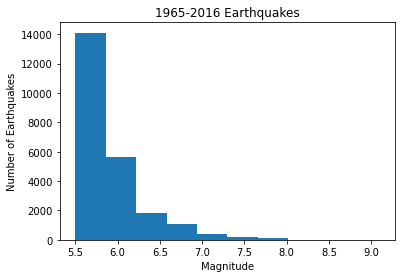

In [33]:
# Histogram (simple way)
# Press 'SHIFT+TAB' to show the tooltip for methdods or parameters
plt.hist(x = df2["Magnitude"])
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")
plt.title( "1965-2016 Earthquakes" )

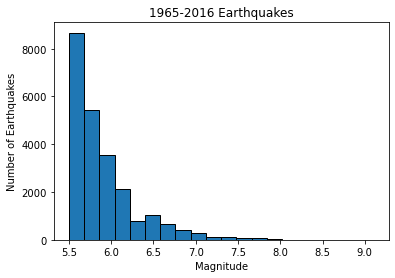

In [21]:
# Histogram with edges and different amount of columns ("bins"), to be chosen accordingly
# This is called "data binning", a technique for tuning the amount of data visualized
myplot(20)

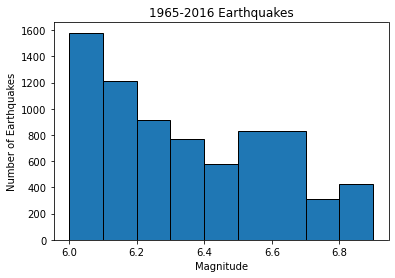

In [22]:
# We can also plot for specific bins (so we can restrict the ranges)
myplot([6,6.1,6.2,6.3,6.4,6.5,6.7,6.8,6.9])

## XY Charts

Text(0.5, 1.0, 'Earthquakes by Year')

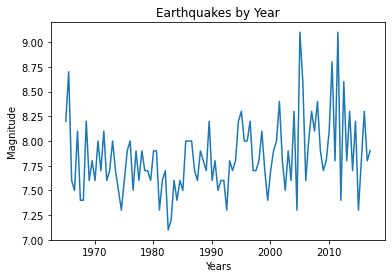

In [23]:
# XY Chart
plt.plot(df2["Magnitude"][df2.Type == "Earthquake"].resample("6M").max())
plt.xlabel("Years")
plt.ylabel("Magnitude")
plt.title("Earthquakes by Year")

## Barcharts

In [24]:
# These two differ, so the bar chart will produce errors ...
print( "Years shape: {0}".format( df2.index.year.unique().shape ))
print( "Eartquakes by Years shape: {0}".format( df2.index.year[df2.Type == "Earthquake"].value_counts().sort_index().shape ))
# The reason is that there are null values for the year ... 
df2.loc[df2.index.year.isnull()]
#So we have to remove them ('na' values)
df2 = df2.reset_index().dropna().set_index("Date_Time")

Years shape: (53,)
Eartquakes by Years shape: (52,)


Text(0.5, 1.0, 'Earthquakes trend per year')

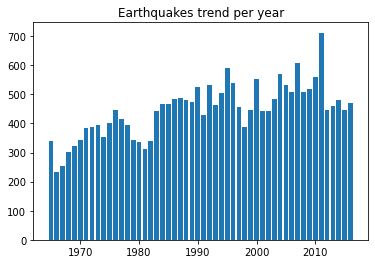

In [25]:
plt.bar(df2.index.year.unique(), df2.index.year[df2.Type == "Earthquake"].value_counts().sort_index())
plt.title("Earthquakes trend per year")

Text(0.5, 1.0, 'Nuclear explosions trend per year')

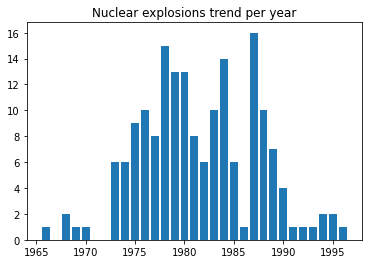

In [26]:
# We can filter the dataset by a specific value too ... like 
plt.bar(
    df2[df2.Type == "Nuclear Explosion"].index.year.unique(), 
    df2.index.year[df2.Type == "Nuclear Explosion"].value_counts().sort_index()
)
plt.title("Nuclear explosions trend per year")

Text(0.5, 1.0, 'Nuclear explosions trend per year')

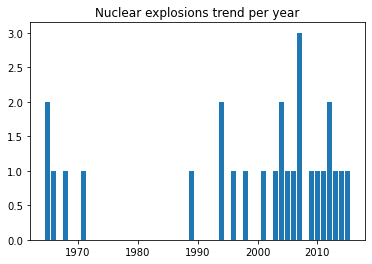

In [27]:
# We can filter the dataset by a specific value too ... like 
plt.bar(
    df2[df2.Magnitude > 8.0].index.year.unique(), 
    df2[df2.Magnitude > 8.0].index.year.value_counts().sort_index()
)
plt.title("Nuclear explosions trend per year")

## Scatter plots

Text(0.5, 1.0, 'Nuclear explosions trend per year')

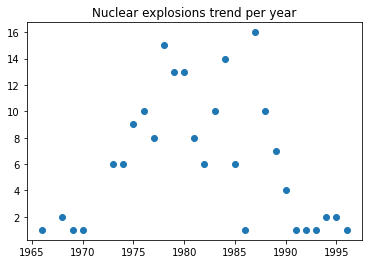

In [28]:
plt.scatter(
    df2[df2.Type == "Nuclear Explosion"].index.year.unique(), 
    df2.index.year[df2.Type == "Nuclear Explosion"].value_counts().sort_index()
)
plt.title("Nuclear explosions trend per year")

Text(0.5, 1.0, 'Nuclear explosions trend per year')

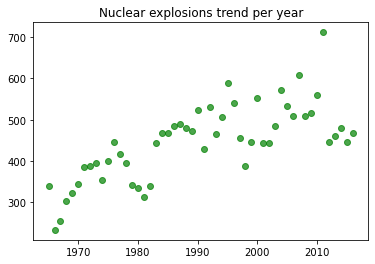

In [29]:
# We can make it look like a bubble chart with different sizes according to the depth
# WARNING: I can't make it work ...
plt.scatter(
    df2[df2.Type == "Earthquake"].index.year.unique(), 
    df2.index.year[df2.Type == "Earthquake"].value_counts().sort_index(),    
#    df2["Depth"],
    c = 'green', alpha = 0.7
)
plt.title("Nuclear explosions trend per year")

Text(0.5, 1.0, 'Stronger Earthquakes are near to surface')

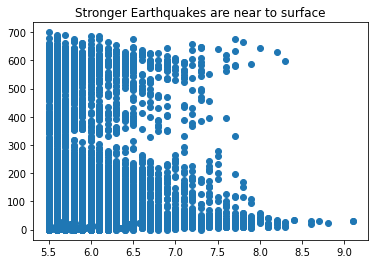

In [30]:
plt.scatter(df2["Magnitude"], df2["Depth"])
plt.title( "Stronger Earthquakes are near to surface" )

Text(0.5, 1.0, 'Earthquakes around the world')

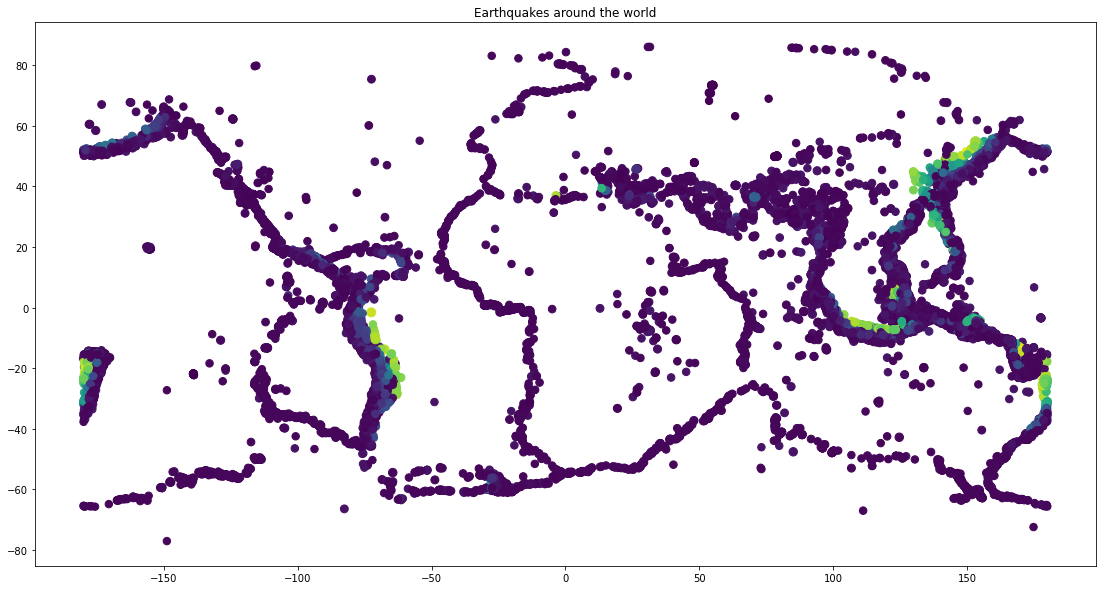

In [31]:
plt.figure(figsize = (19,10) )
plt.scatter(df2["Longitude"], df2["Latitude"],df2["Magnitude"]*10,df2["Depth"])
plt.title( "Earthquakes around the world" )